In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("MI_DB.csv", index_col=0)
# Replace to NaN and convert to float
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)

Text(0.5, 1.0, 'Entry count for each feature')

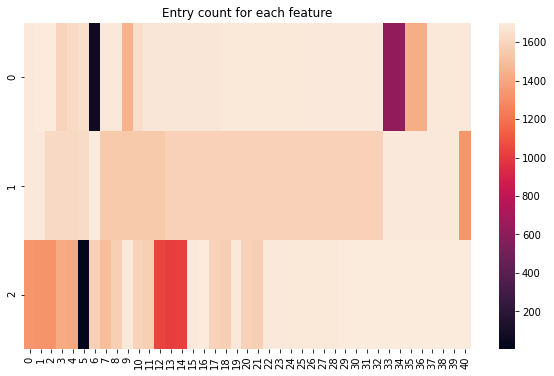

In [81]:
sns.heatmap(np.split(df.count().to_numpy(),3))
plt.title("Entry count for each feature")

### Filter out columns with too much NA values

In [82]:
record_count = df.count().to_numpy()
indexes_high_na = np.where( record_count < 1700*0.3)[0]


In [83]:
name_dropped = df.columns[indexes_high_na].to_numpy() #Keep track of the names of the columns we drop


In [84]:
df = df.drop(df.columns[indexes_high_na], axis = 1)

len(df.count().to_numpy())

121

In [85]:
sns.heatmap(np.split(df.count().to_numpy(),7))
plt.title("Entry count for each feature")

ValueError: array split does not result in an equal division

### Fitlers rows with too much NA

In [86]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,
1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1697,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1698,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6


In [87]:
df["Patient died"] = df["LET_IS"].apply(lambda x: "Yes" if x > 0 else "No")

In [88]:
treshold_na = int(0.2*121) # if more that 50% of missing values, get rid of the row (59)
print("Treshold:",treshold_na)


Treshold: 24


In [89]:
def calculate_NA(row):
    return (row.isna().sum().sum() / 124)*100

df["n_NA"] = df.apply(calculate_NA, axis=1)

([<matplotlib.axis.XTick at 0x13d0d05e0>,
 [Text(0, 0, '0%'), Text(10, 0, '10%'), Text(20, 0, '20%')])

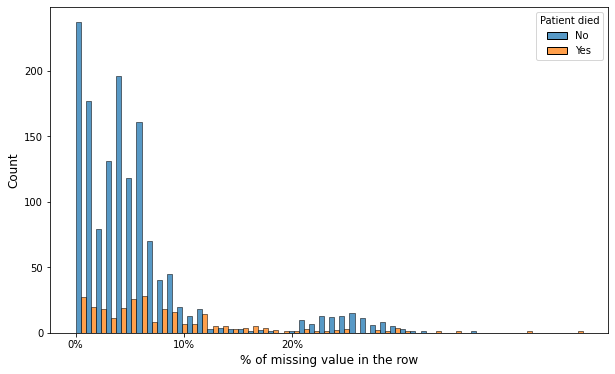

In [90]:
plt.rcParams["figure.figsize"] = (10,6)
sns.histplot(data=df,x="n_NA",hue="Patient died", multiple="dodge")
plt.ylabel("Count",fontsize='large')
plt.xlabel("% of missing value in the row",fontsize='large')
plt.xticks([0,10,20],["0%","10%","20%"])

In [91]:
np.max(df["n_NA"])

46.774193548387096

In [92]:
df = df.drop(df[df["n_NA"] > treshold_na].index)

In [93]:
df = df.drop(["n_NA"], axis=1)


In [94]:
df = df.drop(["Patient died"], axis=1)

#### We dropped 12 rows because they had more than 30% missing values



## Add column dead or not dead

In [95]:
df["DEAD"] = df["LET_IS"].apply(lambda x: 1 if x > 0 else 0)

([<matplotlib.axis.XTick at 0x13d1abaf0>,
 [Text(0, 0, '0: Alive'), Text(1, 0, '1: Dead')])

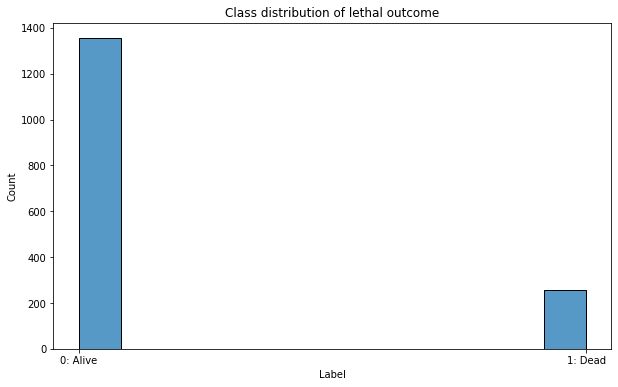

In [96]:
sns.histplot(df["DEAD"])
plt.title("Class distribution of lethal outcome")
plt.xlabel("Label")
plt.xticks([0,1],["0: Alive","1: Dead"])

### Separate features by type (ordinal/binary/numeric)

In [97]:
numeric_attributes = ["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD",
                      "ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

numeric_attributes = [x for x in numeric_attributes if x not in name_dropped]

ord_attributes = ["INF_ANAM","STENOK_AN","FK_STENOK","IBS_POST","GB","DLIT_AG","ZSN_A",
                  "ant_im","lat_im","inf_im","post_im","R_AB_1_n","NA_R_1_n","NOT_NA_1_n",
                 "R_AB_2_n","NA_R_2_n","NOT_NA_2_n","R_AB_3_n","NA_R_3_n","NOT_NA_3_n","TIME_B_S"]


ord_attributes = [x for x in ord_attributes if x not in name_dropped]

Y_labels = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS","DEAD"]

att_names = list(df.columns)

bin_attributes = [x for x in att_names if x not in numeric_attributes+ord_attributes+Y_labels]
bin_attributes = [x for x in bin_attributes if x not in name_dropped]

In [98]:
#Check if everything is ok in the filtering

In [99]:
print(pd.unique(df[bin_attributes].values.ravel('K')))
print(pd.unique(df[ord_attributes].values.ravel('K')))

[ 1.  0. nan]
[ 2.  1.  0.  3. nan  6.  5.  4.  7.  9.  8.]


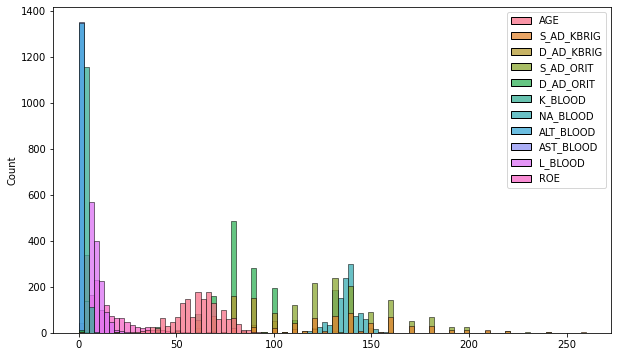

In [100]:
ax = sns.histplot(df[numeric_attributes],bins=100)

In [101]:
len(bin_attributes+ord_attributes+numeric_attributes+Y_labels)

122

In [102]:
len(list(df.columns))

122

In [103]:
colums_id_Y = [df.columns.get_loc(c) for c in Y_labels if c in df]

#### Note: the data set is quite imbalanced, but there is no missing values in the outcome features

In [104]:
df[Y_labels].count()

FIBR_PREDS    1610
PREDS_TAH     1610
JELUD_TAH     1610
FIBR_JELUD    1610
A_V_BLOK      1610
OTEK_LANC     1610
RAZRIV        1610
DRESSLER      1610
ZSN           1610
REC_IM        1610
P_IM_STEN     1610
LET_IS        1610
DEAD          1610
dtype: int64

## Impute the missing values with KNN-impute

In [105]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()

pipe = make_pipeline(scaler, KNNImputer(n_neighbors=10))

imputer = KNNImputer(n_neighbors=3)
df_i = pipe.fit_transform(df)
df_i = scaler.inverse_transform(df_i)

sf_df = pd.DataFrame(df_i, index=df.index, columns=df.columns)

# Round the ordinal values to int

In [106]:
sf_df[ord_attributes]= sf_df[ord_attributes].apply(round,axis=1)

# Round the binary values to int

In [107]:
sf_df[bin_attributes]= sf_df[bin_attributes].apply(round,axis=1)

In [108]:
sf_df.count()

AGE          1610
SEX          1610
INF_ANAM     1610
STENOK_AN    1610
FK_STENOK    1610
             ... 
ZSN          1610
REC_IM       1610
P_IM_STEN    1610
LET_IS       1610
DEAD         1610
Length: 122, dtype: int64

# Make one hot for ordinal attributes

In [109]:
sf_df_dum = pd.get_dummies(sf_df, columns=ord_attributes)

In [110]:
sf_df_dum.count()

AGE             1610
SEX             1610
SIM_GIPERT      1610
nr_11           1610
nr_01           1610
                ... 
TIME_B_S_5.0    1610
TIME_B_S_6.0    1610
TIME_B_S_7.0    1610
TIME_B_S_8.0    1610
TIME_B_S_9.0    1610
Length: 202, dtype: int64

### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix')

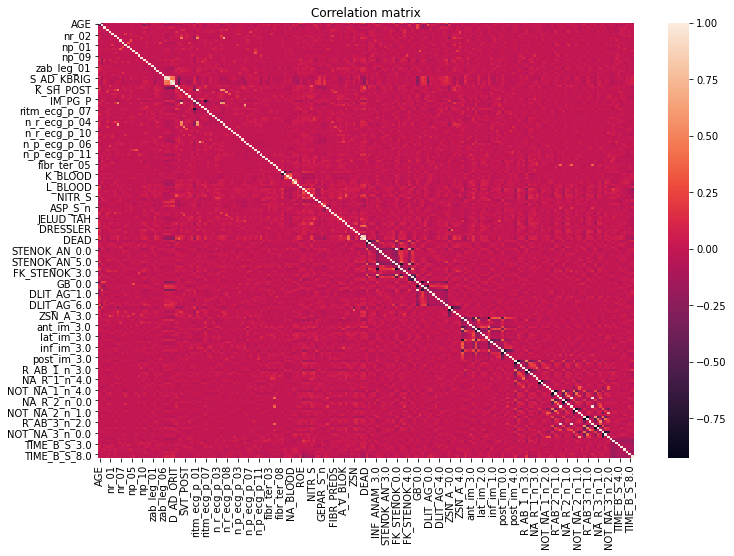

In [111]:
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(sf_df_dum.corr())
plt.title("Correlation matrix")

## Separate X and Y

In [112]:
x_cols = bin_attributes+ord_attributes+numeric_attributes
y_cols = Y_labels

In [113]:
x_cols = [x for x in sf_df_dum.columns if x not in Y_labels]

In [114]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]

In [115]:
scaler.fit(X)
X_sc = scaler.transform(X)
Y_dead = Y["DEAD"].to_numpy().astype(int)

In [116]:
Y_dead = Y["DEAD"].to_numpy()

In [117]:
Y_dead = Y_dead.round().astype(int)

In [119]:
from sklearn.decomposition import PCA
from sklearn.decomposition import MiniBatchSparsePCA
#pca = MiniBatchSparsePCA(n_components=50, batch_size=50,random_state=0)
pca = PCA(n_components=60)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)

In [121]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
ros = RandomOverSampler(random_state=0)
smo = SMOTE()
x_res, y_res = smo.fit_resample(X_sc, Y_dead)

(array([1355.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1355.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

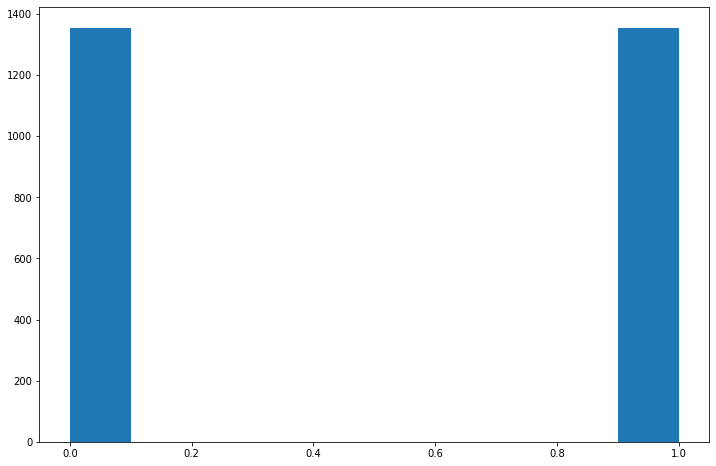

In [122]:
plt.hist(y_res)

# Train a model

Fitting 15 folds for each of 50 candidates, totalling 750 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.006866488450042998, max_iter=10000,
                               penalty='l1'))])
Fitting 15 folds for each of 50 candidates, totalling 750 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.009102981779915217, max_iter=10000,
                               penalty='l1'))])
Fitting 15 folds for each of 50 candidates, totalling 750 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.005689866029018293, max_iter=10000,
                               penalty='l1'))])
Fitting 15 folds for each of 50 candidates, totalling 750 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.0062505519252739694, max_iter=10000,
                               penalty='l1'))])
Fitting 15 folds for each of 50 candidates, totalling 750 fits
best estimator: Pipeline(steps=[

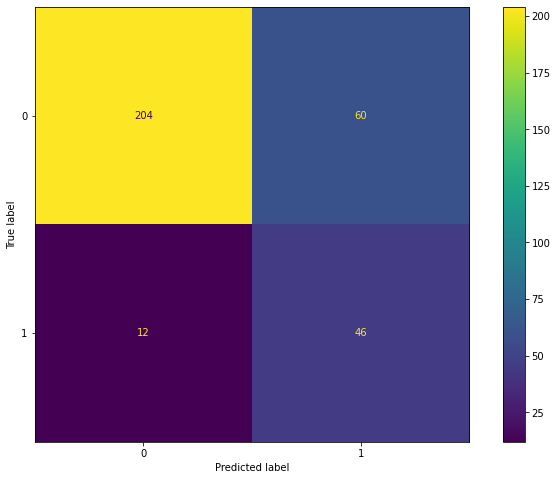

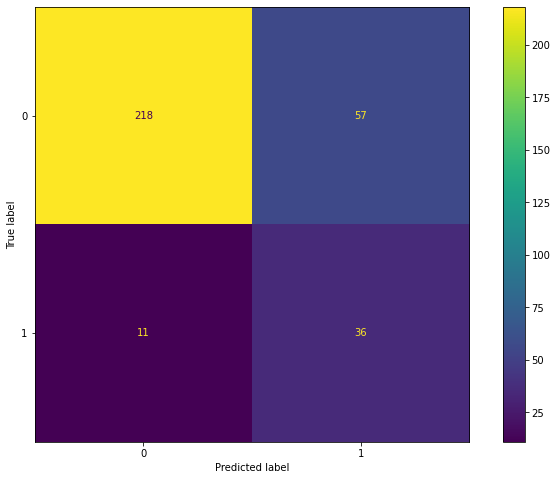

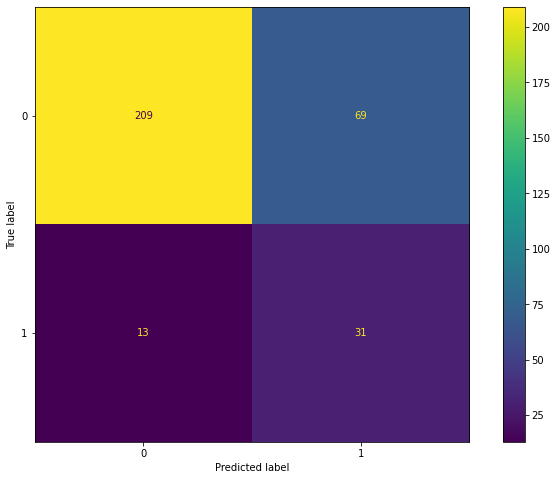

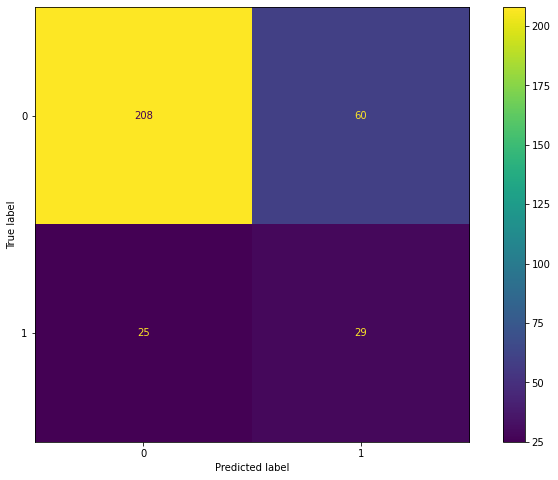

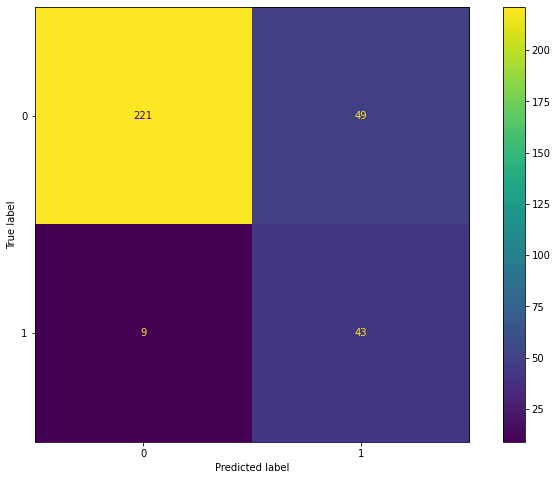

In [125]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []

for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X_sc)):
    x_train, x_test = X_pca[train_ids],X_pca[test_ids]
    y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]
    

    smo = SMOTE()
    x_train, y_train = smo.fit_resample(x_train, y_train)
    
    param_grid = {
        'sgd__alpha': np.logspace(-4,-2,50),
        "sgd__penalty": ["l1"]
    }

    model = Pipeline([
                          ("sgd",SGDClassifier(max_iter=10000))])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="roc_auc")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test)
    plot_confusion_matrix(cv_grid, x_test, y_test)  
    scores.append(balanced_accuracy_score(y_pred,y_test))

print(np.mean(scores))

In [126]:
scores

[0.6892033542976939,
 0.6695309198478658,
 0.6257207207207207,
 0.6092732796450788,
 0.7141304347826087]

Fitting 15 folds for each of 1 candidates, totalling 15 fits


/Users/stephaneguichard/python-projects/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


best estimator: Pipeline(steps=[('sgd', QuadraticDiscriminantAnalysis())])
Fitting 15 folds for each of 1 candidates, totalling 15 fits


/Users/stephaneguichard/python-projects/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


best estimator: Pipeline(steps=[('sgd', QuadraticDiscriminantAnalysis())])
Fitting 15 folds for each of 1 candidates, totalling 15 fits


/Users/stephaneguichard/python-projects/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


best estimator: Pipeline(steps=[('sgd', QuadraticDiscriminantAnalysis())])
Fitting 15 folds for each of 1 candidates, totalling 15 fits


/Users/stephaneguichard/python-projects/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


best estimator: Pipeline(steps=[('sgd', QuadraticDiscriminantAnalysis())])
Fitting 15 folds for each of 1 candidates, totalling 15 fits
best estimator: Pipeline(steps=[('sgd', QuadraticDiscriminantAnalysis())])
0.5074625981636434


/Users/stephaneguichard/python-projects/venv/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


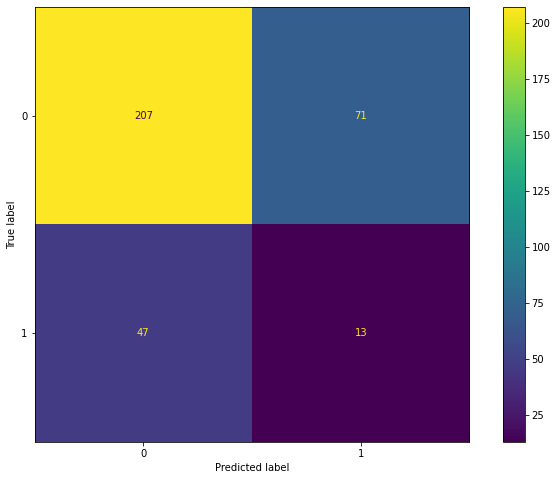

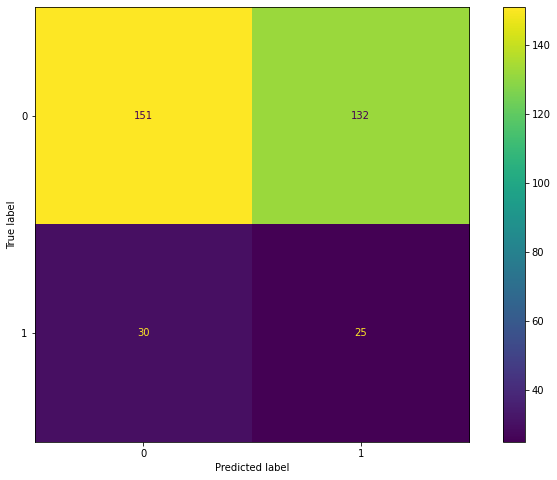

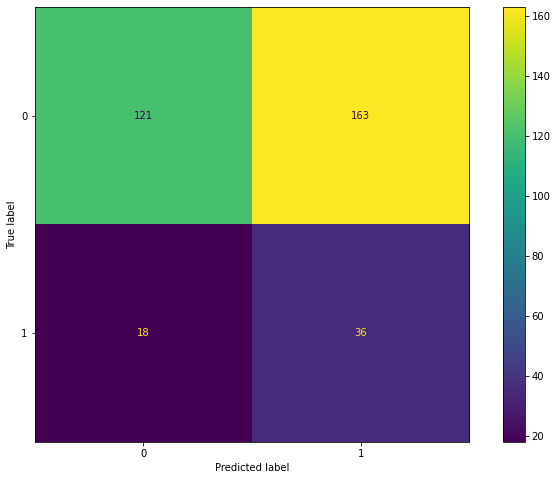

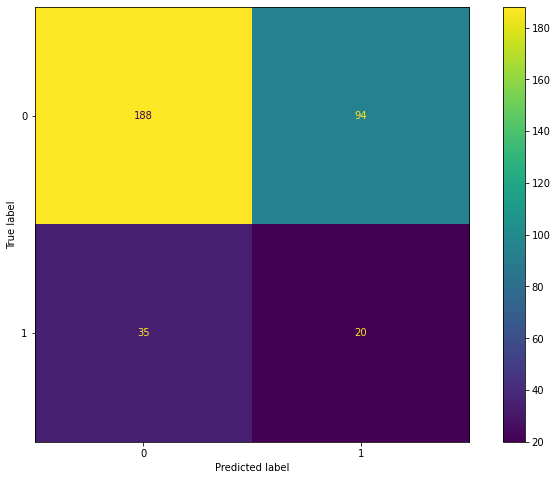

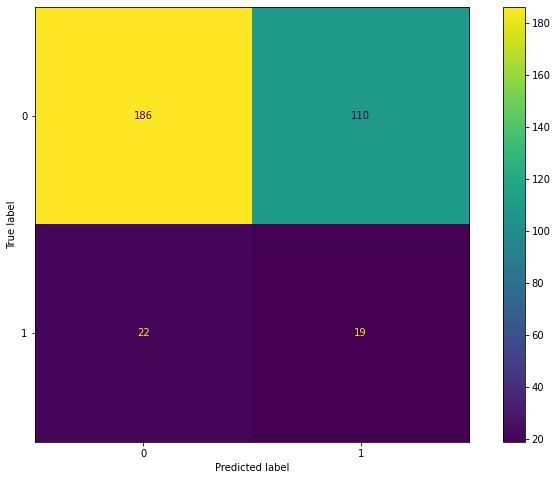

In [632]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []

for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X_sc)):
    x_train, x_test = X_sc[train_ids],X_sc[test_ids]
    y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]
    

    smo = SMOTE()
    x_train, y_train = smo.fit_resample(x_train, y_train)
    
    param_grid = {

    }

    model = Pipeline([
                          ("sgd",QuadraticDiscriminantAnalysis())])
    
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="roc_auc")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test)
    plot_confusion_matrix(cv_grid, x_test, y_test)  
    scores.append(balanced_accuracy_score(y_pred,y_test))

print(np.mean(scores))

In [631]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []

for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X_sc)):
    x_train, x_test = X_sc[train_ids],X_sc[test_ids]
    y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]
    

    smo = SMOTE()
    x_train, y_train = smo.fit_resample(x_train, y_train)
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
    # Number of features to consider at every split
    max_features = ['auto']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True]
    # Create the random grid
    param_grid = {'n_estimators': [300],
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}
    model = RandomForestClassifier(max_depth=10)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1,scoring="balanced_accuracy")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test)
    plot_confusion_matrix(cv_grid, x_test, y_test)  
    scores.append(balanced_accuracy_score(y_pred,y_test))

print(np.mean(scores))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


KeyboardInterrupt: 

In [583]:
scores

[0.8186790505675954,
 0.7809767365121267,
 0.8523076923076923,
 0.7797434763379036,
 0.8095794392523364]

Fitting 15 folds for each of 1 candidates, totalling 15 fits
best estimator: BaggingClassifier(n_estimators=50)
Fitting 15 folds for each of 1 candidates, totalling 15 fits
best estimator: BaggingClassifier(n_estimators=50)
Fitting 15 folds for each of 1 candidates, totalling 15 fits
best estimator: BaggingClassifier(n_estimators=50)
0.7364952586098181


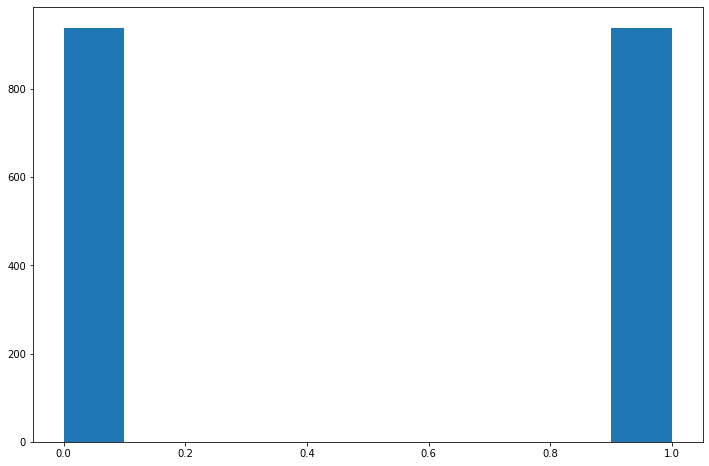

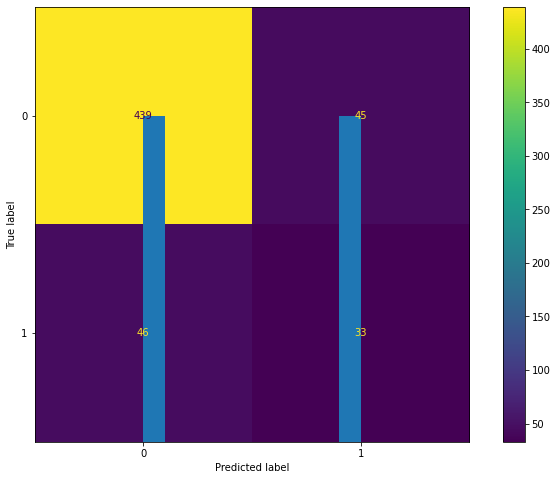

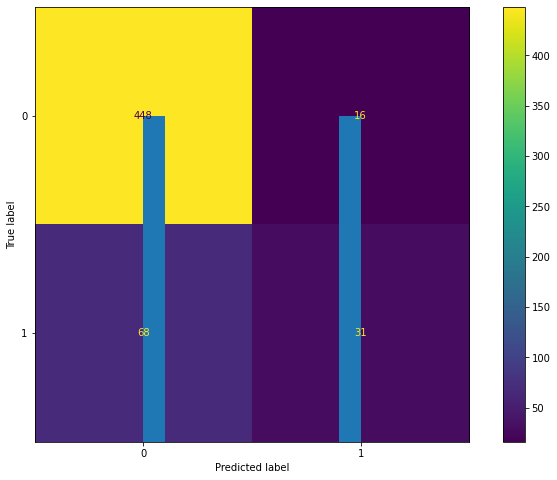

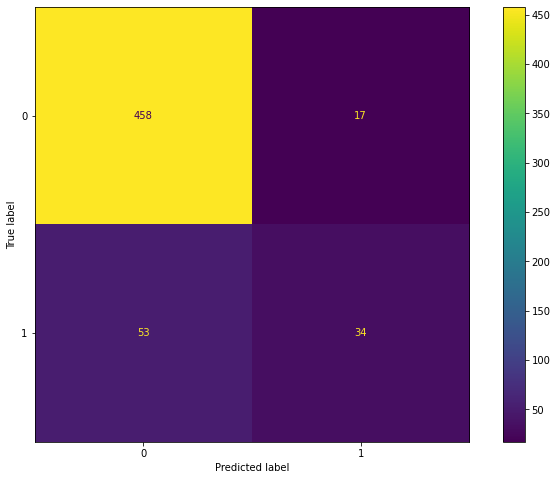

In [612]:
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=3, shuffle=True)
scores = []

for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X_sc)):
    x_train, x_test = X_sc[train_ids],X_sc[test_ids]
    y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]
    

    
    
    ros = RandomOverSampler(random_state=0)
    x_train_r, y_train_r = ros.fit_resample(x_train, y_train)
    plt.hist(y_train_r)
    param_grid = {}
    # define model
    model = BaggingClassifier(n_estimators=50)
    # define evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, verbose=2, n_jobs=-1,scoring="roc_auc")

    cv_grid.fit(x_train_r, y_train_r)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test)
    plot_confusion_matrix(cv_grid, x_test, y_test)  
    scores.append(balanced_accuracy_score(y_pred,y_test))

print(np.mean(scores))